In [2]:
using PulseInputDDM, MAT, LinearAlgebra

In [3]:
x_joint = Vector(undef, 3);
H_joint = Vector(undef, 3);
CIs_joint = Vector(undef, 3);

In [4]:
x_choice = Vector(undef, 3);
H_choice = Vector(undef, 3);
CIs_choice = Vector(undef, 3);

In [5]:
joint_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/joint");
choice_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/choice");

## FOF

In [6]:
region = "FOF"

"FOF"

In [7]:
file = joinpath(joint_model_path, "Fig2-FOF.mat")
xf = read(matopen(file), "ML_params") 
x_joint[1] = xf;

In [8]:
file = joinpath(choice_model_path, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [9]:
file = matopen(joinpath(joint_model_path, "FOF_hessian.mat"))
H_joint[1] = read(file, "H")
close(file)
CIs_joint[1] = hcat(-2*sqrt.(diag(inv(H_joint[1]))), 2*sqrt.(diag(inv(H_joint[1]))));

In [10]:
file = matopen(joinpath(choice_model_path, region*"_hessian.mat"))
H_choice[1] = read(file, "H")
close(file)
CIs_choice[1] = hcat(-2*sqrt.(diag(inv(H_choice[1]))), 2*sqrt.(diag(inv(H_choice[1]))));

## PPC

In [11]:
region = "PPC"

"PPC"

In [12]:
file = joinpath(joint_model_path, "Fig2-PPC.mat")
xf = read(matopen(file), "ML_params")
x_joint[2] = xf;

In [13]:
file = joinpath(choice_model_path, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [14]:
file = matopen(joinpath(joint_model_path, "PPC_hessian.mat"))
H_joint[2] = read(file, "H")
close(file)
CIs_joint[2] = hcat(-2*sqrt.(diag(inv(H_joint[2]))), 2*sqrt.(diag(inv(H_joint[2]))));

In [15]:
file = matopen(joinpath(choice_model_path, region*"_hessian.mat"))
H_choice[2] = read(file, "H")
close(file)
CIs_choice[2] = hcat(-2*sqrt.(diag(inv(H_choice[2]))), 2*sqrt.(diag(inv(H_choice[2]))));

## ADS

In [16]:
region = "ADS"

"ADS"

In [17]:
file = joinpath(joint_model_path, "Fig2-ADS.mat")
xf = read(matopen(file), "ML_params")
x_joint[3] = xf;

In [18]:
file = joinpath(choice_model_path, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [19]:
file = matopen(joinpath(joint_model_path, "ADS_hessian.mat"))
H_joint[3] = read(file, "H")
close(file)
CIs_joint[3] = hcat(-2*sqrt.(diag(inv(H_joint[3]))), 2*sqrt.(diag(inv(H_joint[3]))));

In [20]:
file = matopen(joinpath(choice_model_path, region*"_hessian.mat"))
H_choice[3] = read(file, "H")
close(file)
CIs_choice[3] = hcat(-2*sqrt.(diag(inv(H_choice[3]))), 2*sqrt.(diag(inv(H_choice[3]))));

## Adjust CIs that become negative

In [21]:
CIs22 = map(x-> x[1:7,:], CIs_joint);

bad = map((x,y) -> (y[:,1] + x[1:7] .< 0),  x_joint, CIs22)
map(x-> x[3] = 0, bad)

CIs22[1][bad[1],1] = abs.(max.(0., (CIs22[1][bad[1],1] + x_joint[1][1:7][bad[1]])) - x_joint[1][1:7][bad[1]]);
CIs22[2][bad[2],1] = abs.(max.(0., (CIs22[2][bad[2],1] + x_joint[2][1:7][bad[2]])) - x_joint[2][1:7][bad[2]]);
CIs22[3][bad[3],1] = abs.(max.(0., (CIs22[3][bad[3],1] + x_joint[3][1:7][bad[3]])) - x_joint[3][1:7][bad[3]]);
CIs22 = map(x-> abs.(x), CIs22);

In [22]:
CIs22_choice = map(x-> x[1:7,:], CIs_choice);

bad = map((x,y) -> (y[:,1] + x[1:7] .< 0),  x_choice, CIs22_choice)
map(x-> x[3] = 0, bad)

CIs22_choice[1][bad[1],1] = abs.(max.(0., (CIs22_choice[1][bad[1],1] + x_choice[1][1:7][bad[1]])) - x_choice[1][1:7][bad[1]]);
CIs22_choice[2][bad[2],1] = abs.(max.(0., (CIs22_choice[2][bad[2],1] + x_choice[2][1:7][bad[2]])) - x_choice[2][1:7][bad[2]]);
CIs22_choice[3][bad[3],1] = abs.(max.(0., (CIs22_choice[3][bad[3],1] + x_choice[3][1:7][bad[3]])) - x_choice[3][1:7][bad[3]]);
CIs22_choice = map(x-> abs.(x), CIs22_choice);

## Scale stimulus noise by the average number of clicks in a trial (40)

In [23]:
map(x-> x[5] = 40 * x[5], x_joint);
map(x-> x[5] = 40 * x[5], x_choice);
map(x-> x[5,:] = 40 * x[5,:], CIs22_choice);
map(x-> x[5,:] = 40 * x[5,:], CIs22);

## Plot

In [24]:
ps = ["\$\\sigma_i\$", "B", "λ", "\$\\sigma_a\$", "\$\\sigma_s\$", "ϕ", "\$\\tau_\\phi\$"];

In [25]:
using Colors, PyPlot
my_colors_STR= map(x-> "#"*x, hex.(range(colorant"#A01892", stop=colorant"#E9E62F", length=2)));
my_colors_PPC= map(x-> "#"*x, hex.(range(colorant"#1822A0", stop=colorant"#E99C2F", length=2)));
my_colors_FOF= map(x-> "#"*x, hex.(range(colorant"red", stop=colorant"green", length=2)));

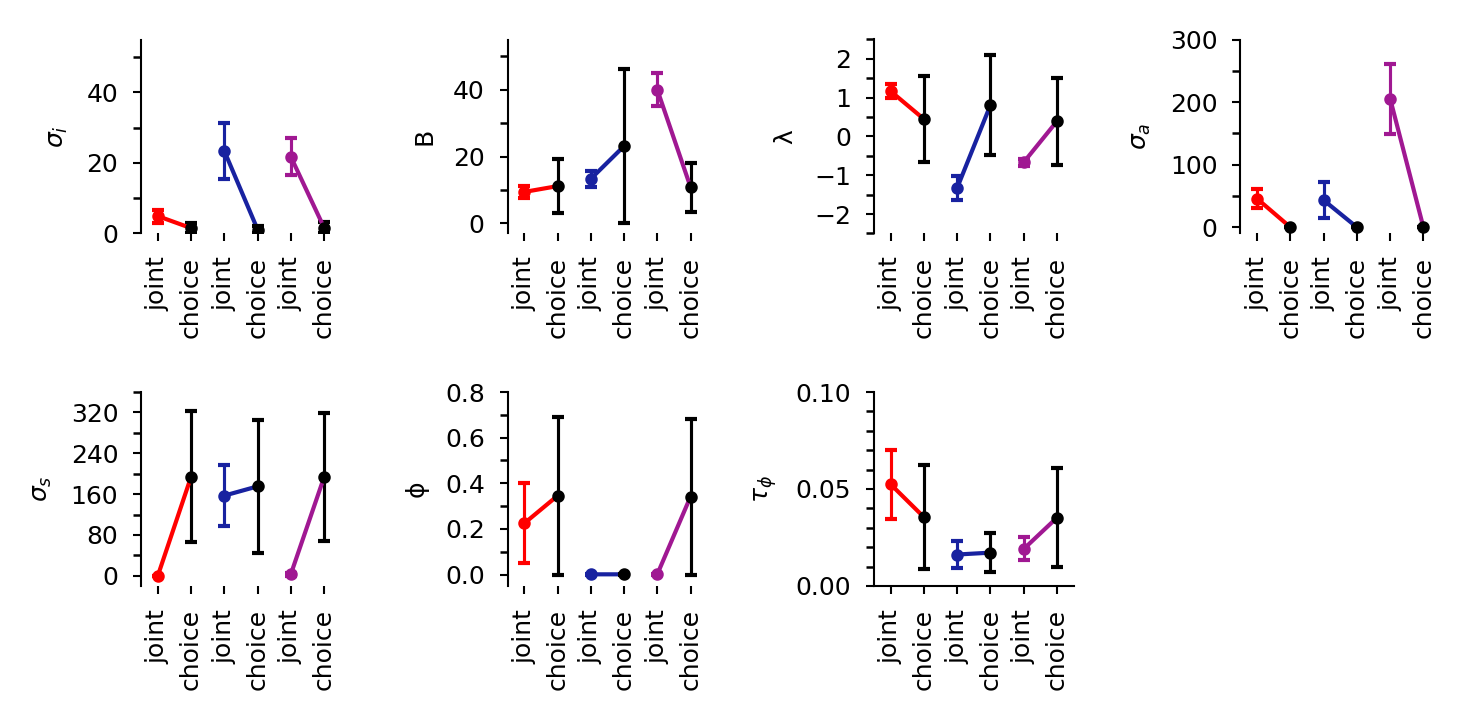

In [26]:
figure(figsize=(5, 2.5), dpi=300, frameon=true)
elinewidth=0.75

fs = 6
ms = 2
cs = 1.5
mycolors = ["red", "#1822A0", "#A01892"]

rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)
rc("font", family="sans-serif")

tot_rats = length(mycolors)
blahs = vcat(["joint", "choice"], ["joint", "choice"], 
    ["joint", "choice"])
subplts = vcat(1:3:7*3, 2:3:7*3, 3:3:7*3)
plt1 = [1.2,3.2,5.2]
plt2 = [1.8,3.8,5.8]

for i = 1:7
    
    subplot(2,4,i)  
    j = 1
    errorbar([1], vcat(x_joint[j][i]), 
        vcat(CIs22[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor=my_colors_FOF[1], 
            fmt="o", color=my_colors_FOF[1], markersize=ms, linestyle="-", linewidth=1)
    
    errorbar([2], vcat(x_choice[j][i]), 
        vcat(CIs22_choice[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor="k", 
            fmt="o", color="k", markersize=ms, linestyle="-", linewidth=1)
    plot(1:2, vcat(x_joint[j][i], x_choice[j][i]), color=my_colors_FOF[1], 
        linestyle="-", linewidth=1)
    
    j = 2
    errorbar([3], vcat(x_joint[j][i]), 
        vcat(CIs22[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor=my_colors_PPC[1], 
                fmt="o", color=my_colors_PPC[1], markersize=ms, linestyle="-", linewidth=1)
    plot(3:4, vcat(x_joint[j][i], x_choice[j][i]), color=my_colors_PPC[1], 
        linestyle="-", linewidth=1)
    
    errorbar([4], vcat(x_choice[j][i]), 
        vcat(CIs22_choice[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor="k", fmt="o", color="k", markersize=ms, linestyle="-", linewidth=1)
    
    j = 3
    errorbar([5], vcat(x_joint[j][i]),
        vcat(CIs22[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor=my_colors_STR[1], 
            fmt="o", color=my_colors_STR[1], markersize=ms, linestyle="-", linewidth=1)
    
    errorbar([6], vcat(x_choice[j][i]),
        vcat(CIs22_choice[j][i]), elinewidth=elinewidth, capsize=cs, 
        ecolor="k", 
            fmt="o", color="k", markersize=ms, linestyle="-", linewidth=1)
    plot(5:6, vcat(x_joint[j][i], x_choice[j][i]), color=my_colors_STR[1], 
        linestyle="-", linewidth=1)

    ylabel(ps[i], fontsize=fs)
    xlim(0.5,6.5)
    
    ax = gca()
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    ax.spines["left"].set_linewidth(0.5)
    ax.tick_params(width=0.5, length=2)
    
    if i == 1
        ylim(0, 55)
        ax.set_yticks(range(0, stop=40, length=3), minor=false)  
        ax.set_yticks(range(0, stop=50, length=6), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 2
        ylim(-3, 55)
        ax.set_yticks(range(0, stop=40, length=3), minor=false)  
        ax.set_yticks(range(0, stop=50, length=6), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 3
        ylim(-2.5, 2.5) 
        ax.set_yticks(range(-2, stop=2, length=5), minor=false)  
        ax.set_yticks(range(-2.5, stop=2.5, length=11), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 4
        ylim(-10, 300)
        ax.set_yticks(range(0, stop=300, length=4), minor=false)  
        ax.set_yticks(range(0, stop=300, length=7), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 5
        ylim(40 * -0.5, 40 * 9)
        ax.set_yticks(range(0, stop=40 * 8, length=5), minor=false)  
        ax.set_yticks(range(0, stop=40 * 9, length=10), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 6
        ylim(-0.05, 0.8)
        ax.set_yticks(range(0, stop=0.8, length=5), minor=false)
        ax.set_yticks(range(0, stop=0.8, length=9), minor=true)
        #ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 7
        ylim(0., 0.10)
        ax.set_yticks(range(0, stop=0.1, length=3), minor=false)  
        ax.set_yticks(range(0, stop=0.1, length=11), minor=true)
        ax.spines["bottom"].set_linewidth(0.5)
    end
    
    xticks(vcat(1:6), blahs, rotation=90) 
    
end

tight_layout()
display(gcf())
close(gcf())
#PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig3A.pdf")